### Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import wordcloud
from nltk.corpus import stopwords
import nltk
import string

In [4]:
df = pd.read_csv('../../data/combined_csv.csv')
df.head()

,customer_name,customer_rating,review_date,customer_review
0,Mahmood Wahid,4.0,2022 12 September,\nFirst Impression:Whoa... will this work it's...
1,J. Fox,4.0,2021 19 June,\nThis unit has great ratings so I'll just ski...
2,Herb,5.0,2021 29 April,\nNot a compensated comment. Overall you can't...
3,KARLA,4.0,2022 1 October,\nSo there is a lot of unmentioned tools neede...
4,Michelle Smith,5.0,2022 16 October,\nIt was perfect. Just what we were looking fo...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19172 entries, 0 to 19171
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_name    19172 non-null  object 
 1   customer_rating  19172 non-null  float64
 2   review_date      19172 non-null  object 
 3   customer_review  19104 non-null  object 
dtypes: float64(1), object(3)
memory usage: 599.2+ KB


In [5]:
df.columns

Index(['customer_name', 'customer_rating', 'review_date', 'customer_review'], dtype='object')

In [6]:
df.describe().round(1)

,customer_rating
count,19172.0
mean,4.2
std,1.4
min,1.0
25%,4.0
50%,5.0
75%,5.0
max,5.0


In [7]:
# Determine how many missing values exist in the collection, in which case you can use .sum() chained onto is.na()
null_values=df.isna().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
customer_review,68,0.355
customer_name,0,0.000
customer_rating,0,0.000
review_date,0,0.000


In [8]:


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vaishanth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/vaishanth/nltk_data...
[nltk_data] Downloading package punkt to /home/vaishanth/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vaishanth/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [9]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
print(len(sw_nltk))

179


In [11]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
# import plotly.express as px

In [12]:
df['customer_rating'].value_counts()

5.0    12916
1.0     2254
4.0     2036
3.0     1156
2.0      810
Name: customer_rating, dtype: int64

In [13]:
def xyz(x):
    if x>3:
        return 'positive'
    else:
        return 'negative'
s=df['customer_rating']
d=list(map(xyz,s))
df['customer_rating']=d
df

,customer_name,customer_rating,review_date,customer_review
0,Mahmood Wahid,positive,2022 12 September,\nFirst Impression:Whoa... will this work it's...
1,J. Fox,positive,2021 19 June,\nThis unit has great ratings so I'll just ski...
2,Herb,positive,2021 29 April,\nNot a compensated comment. Overall you can't...
3,KARLA,positive,2022 1 October,\nSo there is a lot of unmentioned tools neede...
4,Michelle Smith,positive,2022 16 October,\nIt was perfect. Just what we were looking fo...
...,...,...,...,...
19167,Angie,positive,2021 23 April,\nExpected white but more of a cream color. C...
19168,Nats,positive,2021 13 April,"\nSo comfortable, very happy with my purchase\n"
19169,Ana,positive,2022 12 June,"\nSuper comodas , me gustaron mucho!!\n"
19170,Amazon Customer,positive,2022 10 August,\nVery comfortable flip flop and very supporti...


In [14]:
stop_w=set(stopwords.words('english'))
print(stop_w)

{'being', 'up', 'her', 'while', 'just', 'him', "doesn't", 'wasn', 'which', "weren't", 'but', 'mustn', 'where', 'doesn', 'been', 'same', 'to', 'it', 'they', 'hers', 'she', "couldn't", 'shouldn', 'our', 'further', 'be', 'with', 'my', 'needn', 'we', 'no', 'not', 'own', 'because', 'didn', 'was', 'll', 'or', 'this', 'here', 'hasn', 'in', 'now', 'for', 'has', 'again', 't', "isn't", 'into', 'you', "aren't", 'so', 'both', 'hadn', 'weren', 'on', 'who', "wouldn't", 'once', 'too', 'aren', 'such', 'there', 'y', "you've", 'and', 'very', 'what', 'as', "haven't", 'if', 'those', 'until', 'any', 'of', 'should', "should've", 'your', 'most', "mightn't", "she's", "mustn't", "needn't", 'have', 'all', 'that', 'out', 'ourselves', 'above', 's', 'by', 'yourself', 'against', "shouldn't", 'isn', 'a', "you'd", 'did', 'an', 'when', 'more', 'am', 'm', "wasn't", 'his', "that'll", 'don', 'is', 'can', 'herself', 'below', 'them', 'ours', 'were', 'from', 'do', 'theirs', 'ain', 'couldn', 'at', 'myself', 'themselves', 'ab

In [15]:
def stepwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_w]

  return " ".join(text)

In [16]:
texts = [[word for word in document.lower().split() if word not in stop_w] for document in df]

In [17]:
# Trial
from collections import defaultdict 
frequency = defaultdict(int)
for text in texts:
  for token in text:
    frequency[token] += 1
    texts = [[token for token in text if frequency[token] > 1] for text in texts]

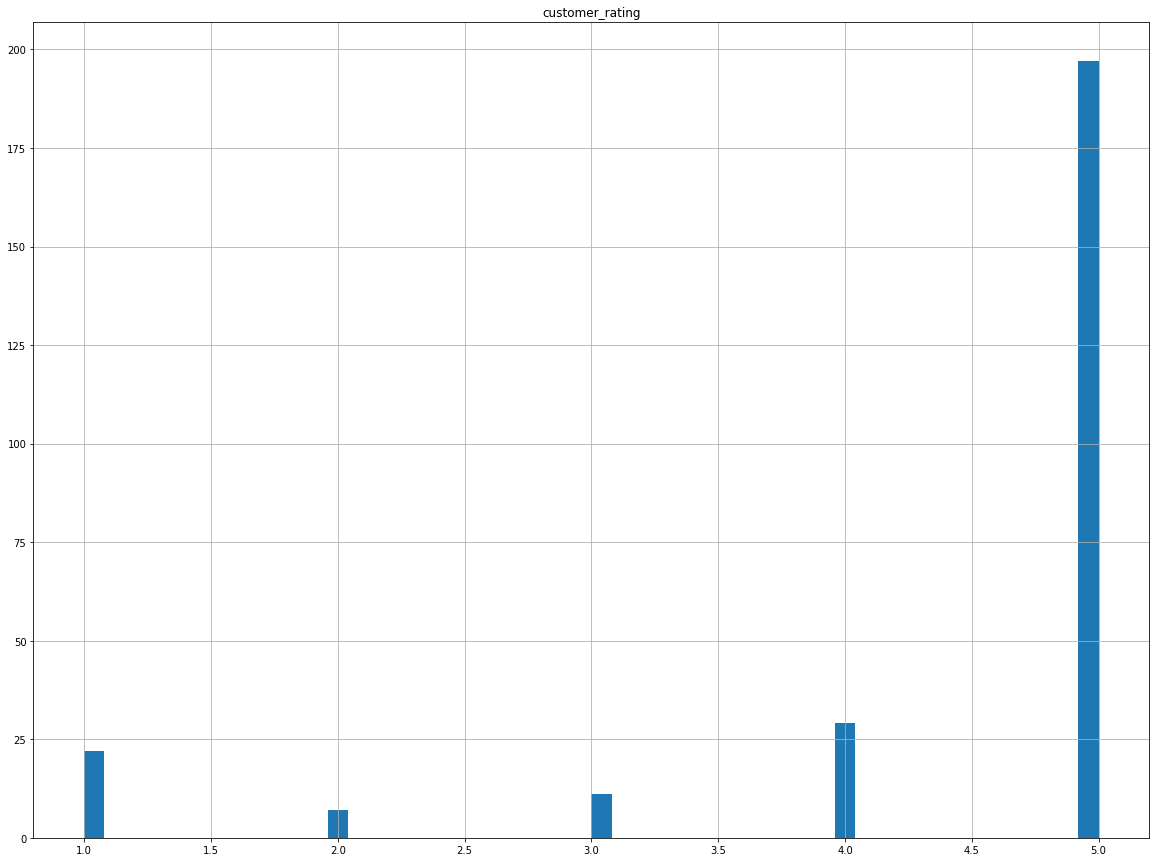

In [64]:
# Plotting the data
df.hist(bins=50, figsize=(20, 15))
plt.show()

Text(0, 0.5, 'number of reviews')

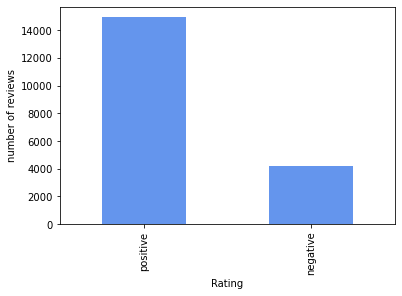

In [18]:
# Hist based on number of ratings of each review
df['customer_rating'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.xlabel('Rating')
plt.ylabel('number of reviews')

In [19]:

import ast
import time
import re
# !pip install matplotlib-venn

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

In [20]:
print( len(df))
df = df[df['customer_review'].notnull()]
print( len(df))
df = df[df['customer_rating'].notnull()]
print( len(df))

19172
19104
19104


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['customer_review'], 
                                                   df['customer_rating'],
                                                   test_size=.2, random_state=1)

In [22]:
vect = CountVectorizer()

# tokenize train and test text data
X_train_dtm = vect.fit_transform(X_train)
print( "number words in training corpus:", len(vect.get_feature_names()))
X_test_dtm = vect.transform(X_test)

number words in training corpus: 14336


/home/vaishanth/anaconda3/envs/env_pytorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

y_pred = nb.predict(X_test_dtm)

# calculate accuracy, precision, recall, and F-measure of class predictions
def eval_predictions(y_test, y_pred):
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('recall:', metrics.recall_score(y_test, y_pred, average='weighted'))
    print('F-measure:', metrics.f1_score(y_test, y_pred, average='weighted'))
eval_predictions(y_test, y_pred)

CPU times: user 29.1 ms, sys: 0 ns, total: 29.1 ms
Wall time: 28.8 ms
accuracy: 0.9068306725987961
precision: 0.907577221362491
recall: 0.9068306725987961
F-measure: 0.9071778237700827


In [26]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.80      0.79       849
    positive       0.94      0.94      0.94      2972

    accuracy                           0.91      3821
   macro avg       0.86      0.87      0.87      3821
weighted avg       0.91      0.91      0.91      3821



In [28]:
data_f=df.sort_values('ProductId').drop_duplicates(subset=['UserId','ProfileName','Time','Summary','Text'],keep='first',inplace=False)
Final_Values=data_f[data_f['HelpfulnessDenominator']>=data_f['HelpfulnessNumerator']]
Final_Values

KeyError: 'ProductId'

In [71]:
fig = px.histogram(df, x="customer_rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()